# Matplotlib의 다양한 플롯

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Bar Chart
- x 데이터가 카테고리 값인 경우

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

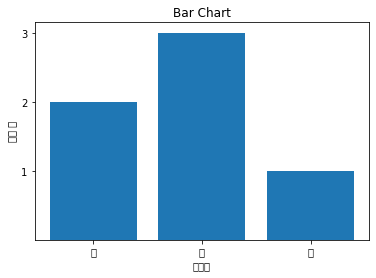

In [2]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

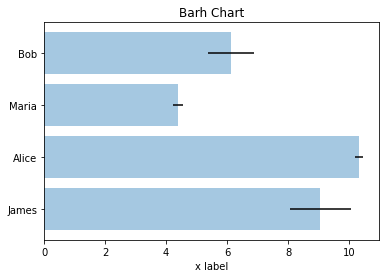

In [5]:
np.random.seed(2021)

people = ['James', 'Alice', 'Maria', 'Bob']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x label')
plt.show()

### 타이나틱 선실별 승객수

In [6]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [16]:
s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

In [12]:
df = titanic[['class', 'pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


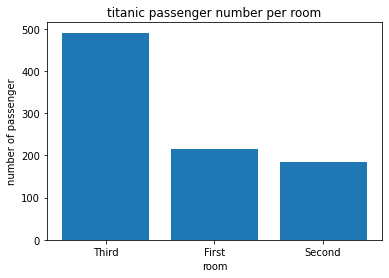

In [21]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()
plt.title('titanic passenger number per room')
plt.bar(x, y)
plt.xticks(x, xlabel)

plt.xlabel('room')
plt.ylabel('number of passenger')
plt.show()

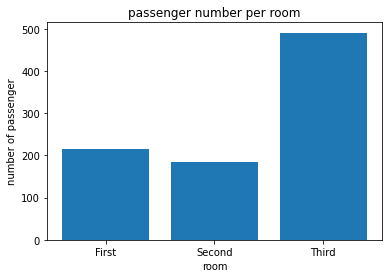

In [22]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('passenger number per room')
plt.bar(x, y)
plt.xticks(x, xlabel)

plt.xlabel('room')
plt.ylabel('number of passenger')
plt.show()



## 2. 파이 차트
- 카테고리 별 값의 상대적인 배교를 해야 할 때

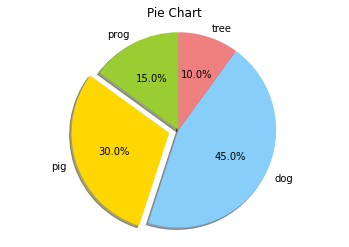

In [26]:
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # 간격 여부
labels = ['prog', 'pig', 'dog', 'tree']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 3. 히스토그램
- 데이터의 분포

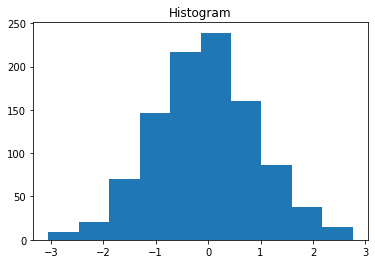

In [27]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)    # x 축의 값을 일정한 간격으로 나눔
plt.show()

In [28]:
bins

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

In [29]:
arrays

array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

## 4. 산점도 (Scatter Plot)

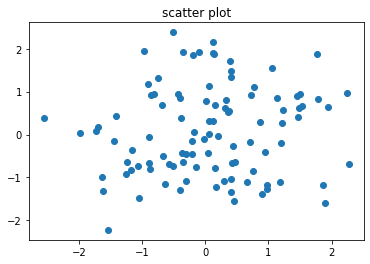

In [32]:
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
plt.title('scatter plot')
plt.scatter(x, y)
plt.show()

### Anscombe's Quartet

In [38]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [42]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [43]:
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

### Dataset I 에 대해서 산점도와 회귀선 그리기

In [55]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


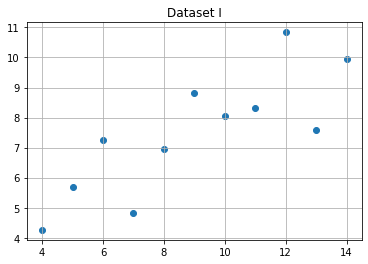

In [56]:
plt.scatter(ds1.x, ds1.y)
plt.grid()
plt.title('Dataset I')
plt.show()

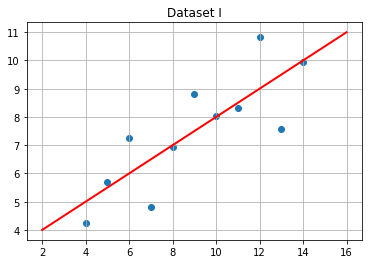

In [57]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2, 16], [4, 11], c='r', lw=2)
plt.grid()
plt.title('Dataset I')
plt.show()

- 4개의 데이터셋 모두 

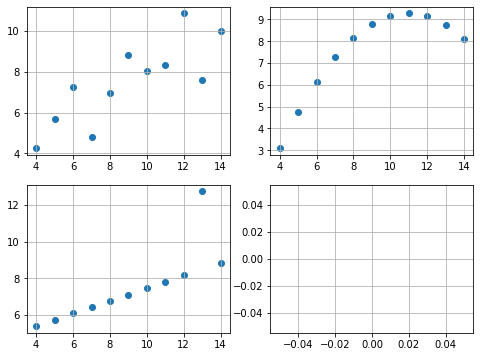

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

for idx, roman in enumerate(['I', 'II', 'III', 'Iv']):
  ds = ans[ans.dataset == roman]
  ax = axes[idx//2, idx%2]
  ax.scatter(ds.x, ds.y)
  ax.grid()
plt.show()

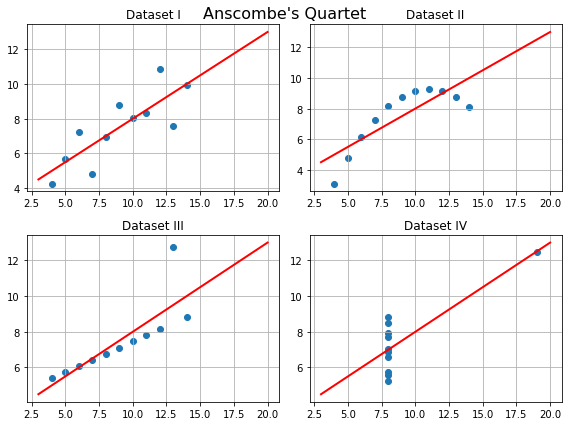

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

for idx, roman in enumerate(['I', 'II', 'III', 'IV']):
  ds = ans[ans.dataset == roman]
  ax = axes[idx//2, idx%2]
  ax.scatter(ds.x, ds.y)
  ax.plot([3, 20], [4.5, 13], 'r-', lw=2)
  ax.set_title(f'Dataset {roman}')
  ax.grid()

fig.suptitle("Anscombe's Quartet", fontsize=16)
plt.tight_layout()
plt.show()

## Imshow
- 이미지데이터

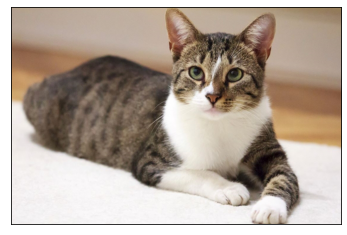

In [64]:
import matplotlib.image as img

image = img.imread('cat.jpg')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [68]:
digits.images.shape

(1797, 8, 8)

AttributeError: ignored

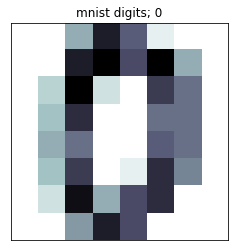

In [69]:
plt.title('mnist digits; 0')
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## 6. Box Plot

In [70]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- setosa 품종의 각 feature의 박스 플롯

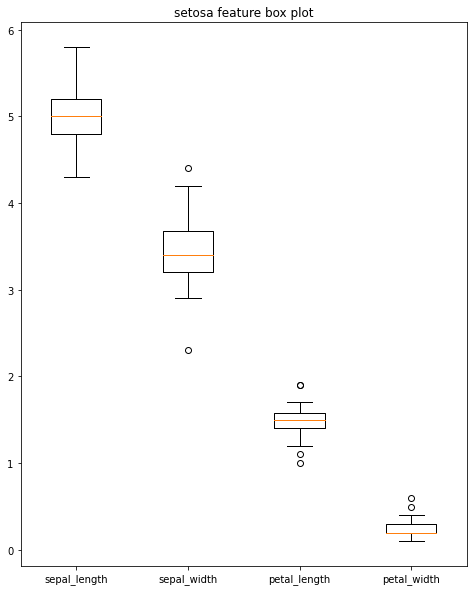

In [76]:
setosa = iris[iris.species == 'setosa']
plt.figure(figsize=(8, 10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
             setosa.petal_length, setosa.petal_width],
            labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('setosa feature box plot')
plt.show()

- 모든 품종의 피쳐별 박스 플롯

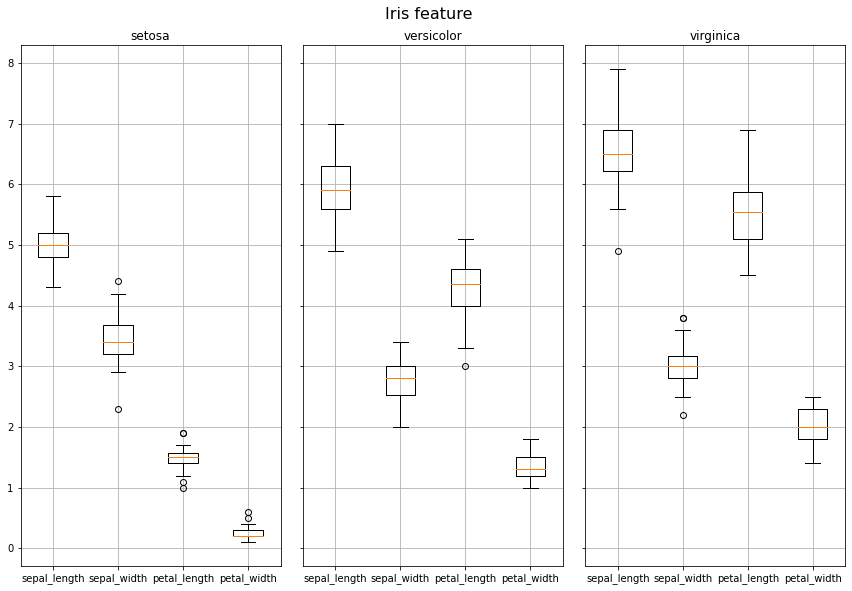

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(12,8), sharey=True)

for idx, species in enumerate(iris.species.unique()):
  sub = iris[iris.species == species]
  ax = axes[idx]
  ax.boxplot([sub.sepal_length, sub.sepal_width,
             sub.petal_length, sub.petal_width],
            labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
  ax.set_title(species)
  ax.grid()

fig.suptitle("Iris feature", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()